<a href="https://colab.research.google.com/github/seoyeonpak/2024F_CDP1_8Team/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Vehicle Data.csv')
selected_columns = ['Speed (km/h)', 'Acceleration (m/s²)', 'Cornering speed (km/h)', 'Throttle position (%)', 'Regen braking level (%)', 'Energy consumption (kWh/km)']
data = df[selected_columns]
print(data.head())

   Speed (km/h)  Acceleration (m/s²)  Cornering speed (km/h)  \
0            91             2.566710                      28   
1            98             2.421393                      31   
2           110             6.682630                      33   
3            72             5.593598                      27   
4            62             1.424797                      31   

   Throttle position (%)  Regen braking level (%)  Energy consumption (kWh/km)  
0                     84                       18                     0.213558  
1                     77                       24                     0.191652  
2                     68                        9                     0.338571  
3                     60                       19                     0.276427  
4                     62                       16                     0.215260  


In [34]:
# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(data_scaled)

[[ 0.22399529 -1.32676415  0.07909071  1.8912435   0.20163119 -1.49370041]
 [ 0.5815052  -1.3984806   0.60495982  1.23415431  1.30093799 -1.83317852]
 [ 1.19437935  0.7045036   0.95553923  0.38932535 -1.44732902  0.443599  ]
 ...
 [ 0.07077675  1.74047207  0.25438042 -1.58194223 -0.53124001  1.71224526]
 [ 0.12184959 -0.58285459  0.95553923  0.95254465 -0.71445781 -0.66212327]
 [ 0.63257805 -0.60320066  0.42967012 -0.36163373  0.75128459  0.23697215]]


In [35]:
# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, df.index, test_size=0.3, random_state=42)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# 예측
y_pred = knn.predict(X_test)

# 결과 출력
df_test = pd.DataFrame(X_test, columns=selected_columns)
df_test['Actual ID'] = y_test.values
df_test['Predicted ID'] = y_pred
print(df_test.head())

   Speed (km/h)  Acceleration (m/s²)  Cornering speed (km/h)  \
0     -0.491025             1.322658                1.130829   
1     -1.665700             0.028617               -1.147937   
2      1.551889             0.207429               -0.096199   
3     -1.154972             1.055825               -0.446778   
4      0.734724             0.849386                1.306119   

   Throttle position (%)  Regen braking level (%)  \
0              -1.018723                 0.568067   
1              -0.643243                -0.531240   
2               0.764805                -0.531240   
3              -0.643243                 1.300938   
4              -1.488072                -0.164804   

   Energy consumption (kWh/km)  Actual ID  Predicted ID  
0                     0.558476       6252          3851  
1                     0.109900       4684          1535  
2                    -0.087894       1731          2258  
3                     0.552648       4742          3794  
4     

                             Principal Component 1  Principal Component 2
Speed (km/h)                              0.321758               0.901699
Acceleration (m/s²)                       0.441104              -0.103950
Cornering speed (km/h)                    0.374137              -0.076038
Throttle position (%)                    -0.390635               0.399440
Regen braking level (%)                  -0.373426               0.091447
Energy consumption (kWh/km)               0.519499              -0.049362


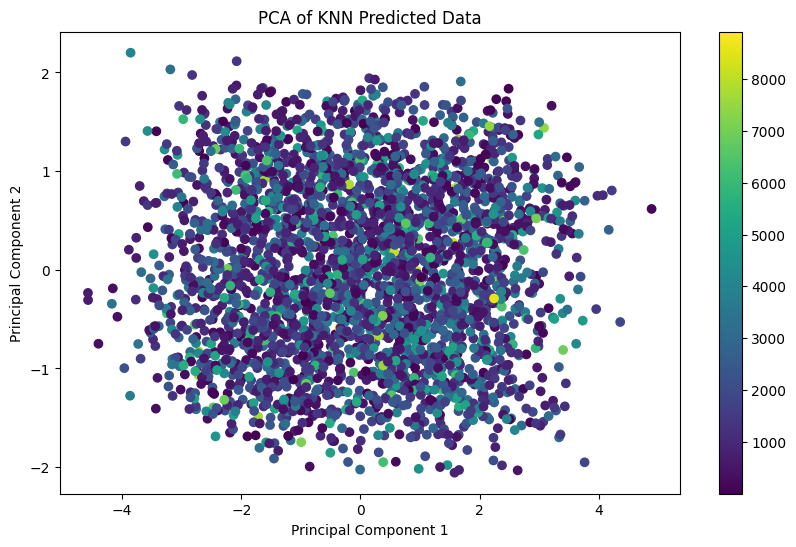

In [48]:
# PCA 적용
pca = PCA(n_components=2)  # 2차원으로 축소
data_pca = pca.fit_transform(X_test)

# 주성분 부하량 출력
loadings = pd.DataFrame(pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=selected_columns)
print(loadings)

# PCA 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_test['Predicted ID'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of KNN Predicted Data')
plt.colorbar()
plt.show()